In [3]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD  # Corrected optimizer import


# Fix random seed for reproducibility
np.random.seed(7)

# Load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
#creating conventional layer 32 map size of 3 ,3 by using the conv2d function.
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
#dropping the layout by using dropout function and mentioning size or factor
model.add(Dropout(0.2))
#creating conventional layer 32 map size of 3 ,3 by using the conv2d function.
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
#finding the maxpool layer using maxpooling2d and mentioning the required size
model.add(MaxPooling2D(pool_size=(2, 2)))
#creating conventional layer 64 map size of 3 ,3 by using the conv2d function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#dropping the layout by using dropout function and mentioning size or factor
model.add(Dropout(0.2))
#creating conventional layer 64 map size of 3 ,3 by using the conv2d function.
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
#finding the maxpool layer using maxpooling2d and mentioning the required size
model.add(MaxPooling2D(pool_size=(2, 2)))
#creating conventional layer 128 map size of 3 ,3 by using the conv2d function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#dropping the layout by using dropout function and mentioning size or factor
model.add(Dropout(0.2))
#creating conventional layer 128 map size of 3 ,3 by using the conv2d function.
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
#finding the maxpool layer using maxpooling2d and mentioning the required size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#dropping the layout by using dropout function and mentioning size or factor
model.add(Dropout(0.2))
#fully connecting the 1024 units with fully activated function relu
model.add(Dense(1024, activation='relu'))
#dropping the layout by using dropout function and mentioning size or factor
model.add(Dropout(0.2))
#fully connecting the 512 units with fully activated function relu
model.add(Dense(512, activation='relu'))
#dropping the layout by using dropout function and mentioning size or factor
model.add(Dropout(0.2))
#Fully connected output layer with 10 units and a Softmax activation function
model.add(Dense(num_classes, activation='softmax'))

# Compile model
epochs = 5
learning_rate = 0.01
decay_rate = learning_rate / epochs
sgd = SGD(learning_rate=learning_rate, momentum=0.9, decay=decay_rate, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,915,114 (11.12 MB)

 Trainable params: 2,915,114 (11.12 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 417s 264ms/step - accuracy: 0.2357 - loss: 2.0484 - val_accuracy: 0.4211 - val_loss: 1.6097
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 417s 248ms/step - accuracy: 0.4604 - loss: 1.4931 - val_accuracy: 0.5608 - val_loss: 1.2246
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 386s 247ms/step - accuracy: 0.5454 - loss: 1.2586 - val_accuracy: 0.6150 - val_loss: 1.0836
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 440s 246ms/step - accuracy: 0.6213 - loss: 1.0739 - val_accuracy: 0.6525 - val_loss: 0.9873
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 445s 248ms/step - accuracy: 0.6625 - loss: 0.9506 - val_accuracy: 0.6868 - val_loss: 0.8942
Accuracy: 68.68%


In [4]:
# Predict the first 4 images of the test data
predictions = model.predict(X_test[:4])

# Convert the predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert the actual labels to class labels
actual_labels = np.argmax(y_test[:4], axis=1)

# Print the predicted and actual labels for the  first 4 images
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Predicted labels: [3 8 8 0]
Actual labels: [3 8 8 0]


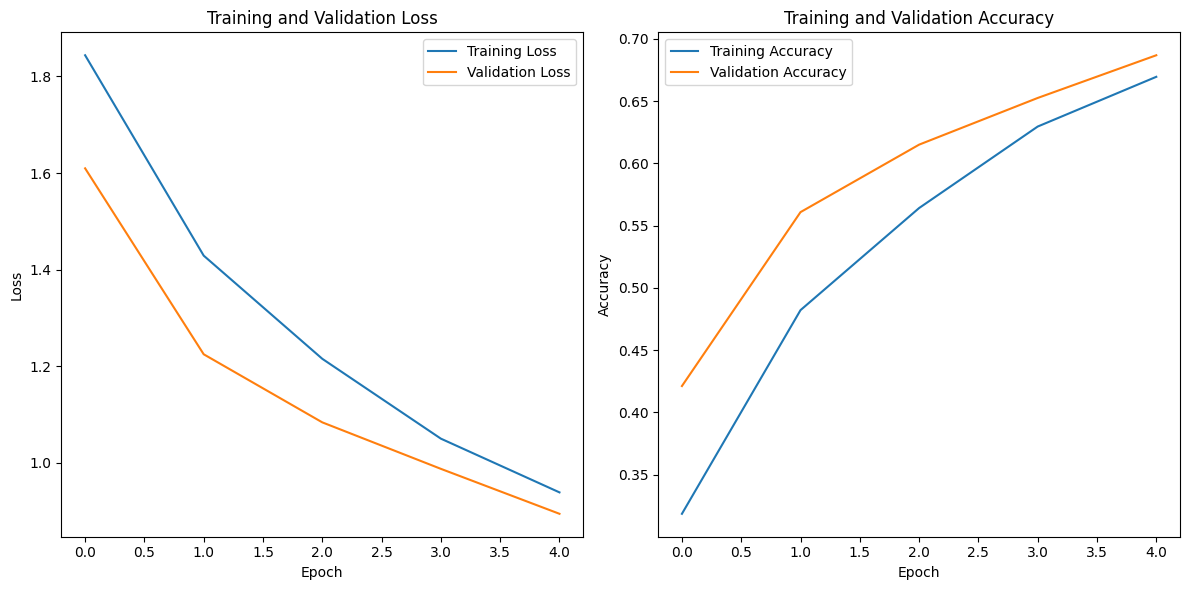

In [5]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()